In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
from shutil import copy2
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [4]:
# annFolder = "train-coco"
# annFile=os.path.join(annFolder, "annotations.json")
# annFile = ("../Fsz0hKLEPdc.mkv.json")
annFile = ("../annotations/train.json")

In [5]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [6]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
kreuz adler flagge_ukr flagge_upa ukraine hakenkreuz ss_rune bandera georgsband hammer&sichel Wolfsangel oun swoboda falanga nato flagge_ru eu



In [11]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['hakenkreuz']);
imgIds = coco.getImgIds(catIds=catIds );
print(len(imgIds))
for imId in imgIds:
    img = coco.loadImgs(imId)
    print(img)
    #copy2("../annotations/val_images/"+img[0]["file_name"], "bandera/"+img[0]["file_name"])



87
[{'license': 1, 'coco_url': '', 'flickr_url': '', 'id': 3, 'file_name': '440446592-antibolschewistische-ausstellung-kollektion-julien-bryan-hakenkreuzflagge-lateinische-schrift.png', 'date_captured': '2017-05-22 12:54:04', 'height': 270, 'width': 480}]
[{'license': 1, 'coco_url': '', 'flickr_url': '', 'id': 521, 'file_name': '2017-07-17-040541_1680x1050_scrot.png', 'date_captured': '2017-07-17 09:05:42', 'height': 1050, 'width': 1680}]
[{'license': 1, 'coco_url': '', 'flickr_url': '', 'id': 10, 'file_name': 'la_grande_revolution_en_ukraine_by_agniagnellius_d86p25o-pre.jpg', 'date_captured': '2019-02-27 13:49:22', 'height': 1064, 'width': 751}]
[{'license': 1, 'coco_url': '', 'flickr_url': '', 'id': 14, 'file_name': '2017-07-17-041407_1680x1050_scrot.png', 'date_captured': '2017-07-17 09:14:06', 'height': 1050, 'width': 1680}]
[{'license': 1, 'coco_url': '', 'flickr_url': '', 'id': 546, 'file_name': '2017-10-11-053211_1680x1050_scrot.png', 'date_captured': '2017-10-11 10:32:12', 'hei

In [9]:
# 1348
imgIds = coco.getImgIds(imgIds = [3])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(img)
I = io.imread("hakenkreuz/"+img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

{'license': 1, 'coco_url': '', 'flickr_url': '', 'id': 3, 'file_name': '440446592-antibolschewistische-ausstellung-kollektion-julien-bryan-hakenkreuzflagge-lateinische-schrift.png', 'date_captured': '2017-05-22 12:54:04', 'height': 270, 'width': 480}


FileNotFoundError: No such file: '/home/ghowa/dhd2020/notebooks/hakenkreuz/440446592-antibolschewistische-ausstellung-kollektion-julien-bryan-hakenkreuzflagge-lateinische-schrift.png'

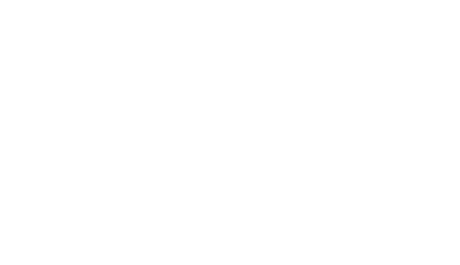

In [14]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_n1348ame']))
# use url to load image
# I = io.imread(os.path.join(annFolder, img['file_name']))
I = io.imread("blank.png")
plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
# get frames from vid


[{'id': 2392, 'image_id': 1348, 'category_id': 102, 'bbox': [215.0, 169.0, 148.0, 499.0], 'area': 33351, 'segmentation': [[296.41025641025647, 168.5897435897436, 214.35897435897442, 554.4871794871794, 363.0769230769231, 668.5897435897435]], 'iscrowd': 0}]


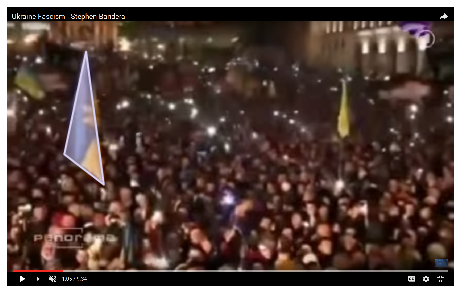

In [21]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=1348, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
print(anns)